<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/nltk_colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import nltk

CPU times: user 684 ms, sys: 224 ms, total: 908 ms
Wall time: 1.59 s


In [2]:
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [5]:
from nltk.tokenize import sent_tokenize 
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize 
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [7]:
from nltk.tokenize import RegexpTokenizer 
retokenize = RegexpTokenizer("[\w]+") 
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'files', 'flying', 'flew', 'flown']

print('porter stemmer : ', [st1.stem(w) for w in words])
print('lancaster stemmer : ', [st2.stem(w) for w in words])


porter stemmer :  ['fli', 'file', 'fli', 'flew', 'flown']
lancaster stemmer :  ['fly', 'fil', 'fly', 'flew', 'flown']


In [9]:
from nltk.stem import WordNetLemmatizer 
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos = "v") for w in words]

['fly', 'file', 'fly', 'fly', 'fly']

In [10]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [11]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit" 
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [12]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"] 
nouns_list

['refuse', 'permit']

In [13]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [14]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [15]:
from nltk import Text
text = Text(retokenize.tokenize(emma_raw))

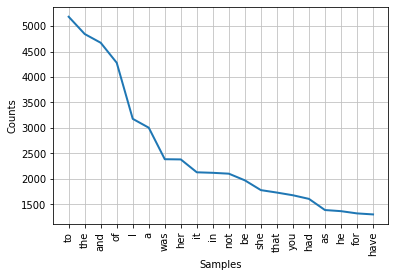

In [16]:
text.plot(20)

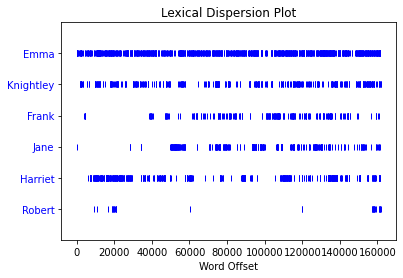

In [17]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [18]:
text.concordance("Emma")

Displaying 25 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could

In [19]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [20]:
text.common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [21]:
fd = text.vocab() 
type(fd)

nltk.probability.FreqDist

In [23]:
from nltk import FreqDist
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [24]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [25]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]